# Exercise 5

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

In [448]:
df = pd.read_excel('traveldata.xlsx')

In [449]:
df

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,76,3,3.25,6.4


## A. Correlation

### Check the relationships between each independent variable and the dependent variable using scatterplots and correlations.

1. Create scatter plot between miles traveled and travel time

<Axes: xlabel='Miles Traveled', ylabel='Travel Time'>

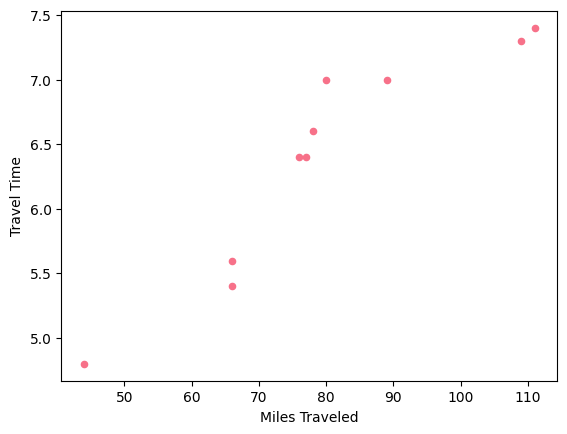

In [450]:
df.plot(x='Miles Traveled',y='Travel Time',kind='scatter')

2. Create scatter plot between number of deliveries and travel time

<Axes: xlabel='Number of Deliveries', ylabel='Travel Time'>

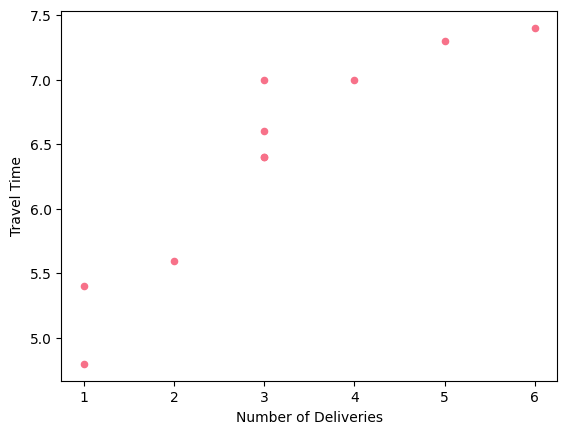

In [451]:
df.plot(x='Number of Deliveries',y='Travel Time',kind='scatter')

3. Create scatter plot between Gas Price and Travel time

<Axes: xlabel='Gas Price', ylabel='Travel Time'>

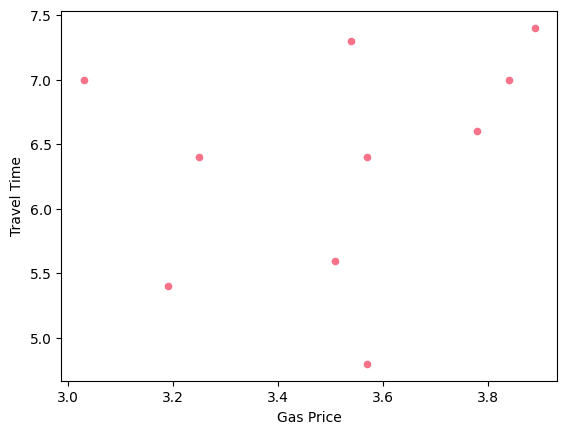

In [452]:
df.plot(x='Gas Price',y='Travel Time',kind='scatter')

4. Create a pairplot

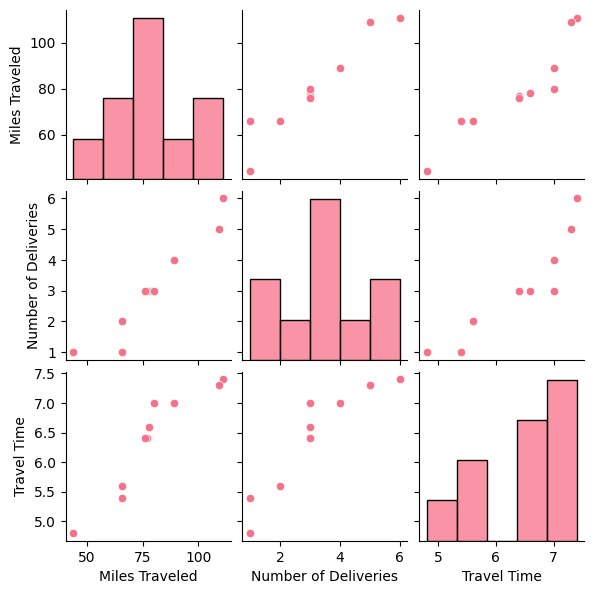

In [453]:
sns.set_palette('husl', 7)
sns.pairplot(data=df[['Miles Traveled', 'Number of Deliveries', 'Travel Time']],height=2)

5. Calculate correlation coefficient and p-value between Miles Traveled and Travel Time

In [454]:
result = pearsonr(df['Miles Traveled'],df['Travel Time'])
print("Miles Traveled and Travel Time")
print("correlation and coefficient: ", result[0])
print("p-value: ", result[1])


Miles Traveled and Travel Time
correlation and coefficient:  0.928178500887476
p-value:  0.00010667565429896801


6. Calculate correlation coefficient p-value between Number of Deliveries and Travel Time

In [455]:
result = pearsonr(df['Number of Deliveries'],df['Travel Time'])
print("Number of Deliveries and Travel Time")
print("correlation and coefficient: ", result[0])
print("p-value: ", result[1])


Number of Deliveries and Travel Time
correlation and coefficient:  0.9164433964470268
p-value:  0.00019260878342962958


7. Calculate correlation coefficient and p-value between Gas Price and Travel Time

In [456]:
result = pearsonr(df['Gas Price'],df['Travel Time'])
print("Gas Price and Travel Time")
print("correlation and coefficient: ", result[0])
print("p-value: ", result[1])


Gas Price and Travel Time
correlation and coefficient:  0.2672115310193847
p-value:  0.45545341268508166


### Check the relationships among the independent variables using scatterplots and correlations.

8. Create scatter plot between Miles Traveled and Number of Deliveries.

<Axes: xlabel='Miles Traveled', ylabel='Number of Deliveries'>

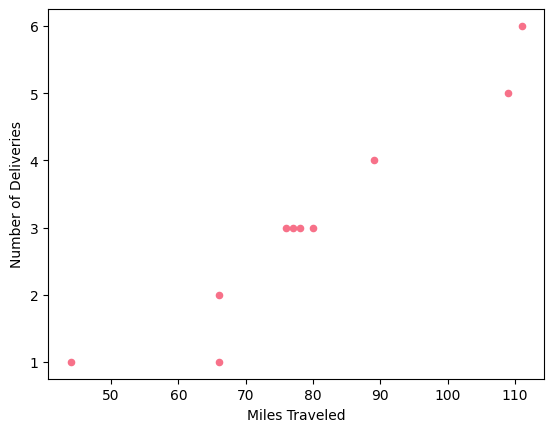

In [457]:
df.plot(x='Miles Traveled',y='Number of Deliveries',kind='scatter')

9. Create scatter plot between Miles traveled and Gas Price

<Axes: xlabel='Miles Traveled', ylabel='Gas Price'>

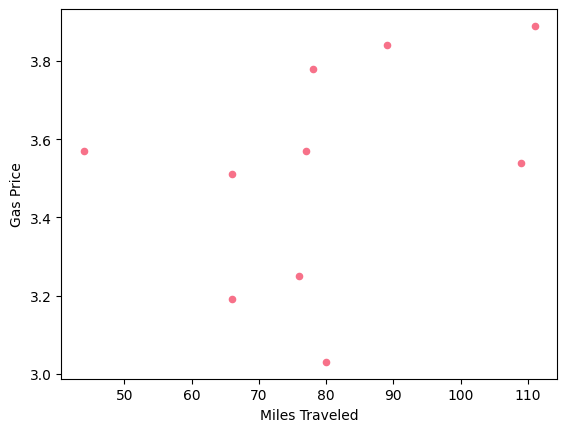

In [458]:
df.plot(x='Miles Traveled',y='Gas Price',kind='scatter')

10. Create scatter plot between Number of Deliveries and Gas Price

<Axes: xlabel='Number of Deliveries', ylabel='Gas Price'>

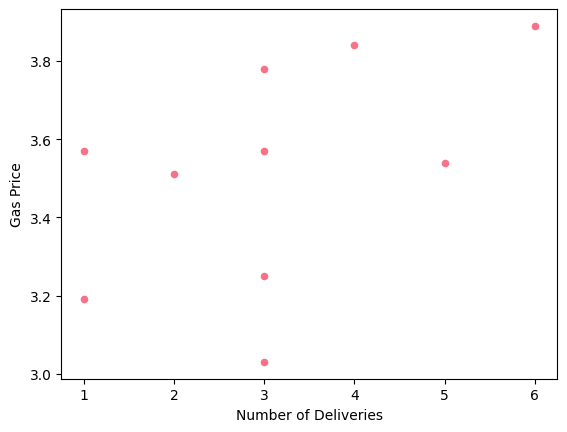

In [459]:
df.plot(x='Number of Deliveries',y='Gas Price',kind='scatter')

11. Calculate correlation coefficient and p-value between Miles Traveled and Number of Deliveries

In [460]:
result = pearsonr(df['Miles Traveled'],df['Number of Deliveries'])
print("Miles Traveled and Number of Deliveries")
print("correlation and coefficient: ", result[0])
print("p-value: ", result[1])

Miles Traveled and Number of Deliveries
correlation and coefficient:  0.9558982066200347
p-value:  1.5690314407660616e-05


12. Calculate correlation coefficient and p-value between Miles Traveled and Gas Price

In [461]:
result = pearsonr(df['Miles Traveled'],df['Gas Price'])
print("Miles Traveled and Gas Price")
print("correlation and coefficient: ", result[0])
print("p-value: ", result[1])

Miles Traveled and Gas Price
correlation and coefficient:  0.35579623354708517
p-value:  0.31296405908178965


13. Calculate correlation coefficient and p-value between Number of Deliveries and Gas Price

In [462]:
result = pearsonr(df['Number of Deliveries'],df['Gas Price'])
print("Number of Deliveries and Gas Price")
print("correlation and coefficient: ", result[0])
print("p-value: ", result[1])

Number of Deliveries and Gas Price
correlation and coefficient:  0.4982421647401633
p-value:  0.142741207670319


### Correlation Summary

14. Create the correlation summary

In [463]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Miles Traveled,Number of Deliveries,Gas Price,Travel Time
Miles Traveled,1.000000,0.955898,0.355796,0.928179
Number of Deliveries,0.955898,1.000000,0.498242,0.916443
Gas Price,0.355796,0.498242,1.000000,0.267212
Travel Time,0.928179,0.916443,0.267212,1.000000


15. Create a correlation matrix

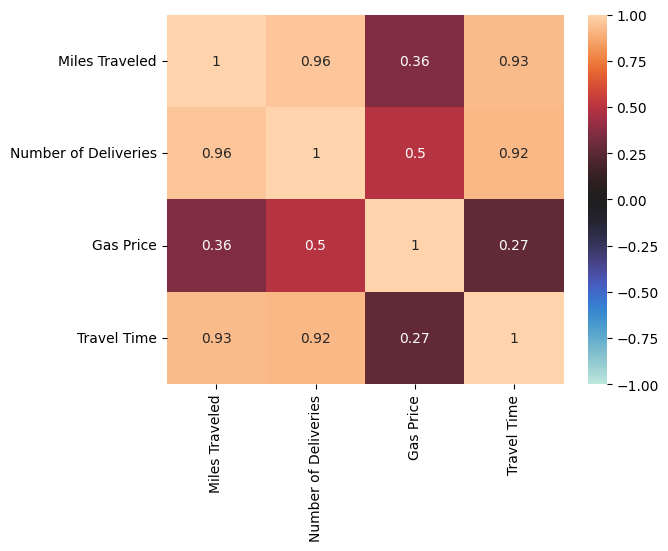

In [464]:
matrix = df.corr()
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, center=0)
plt.show()


## Building Different Regression Models

### Model 1: Miles Traveled and Travel Time

16. Set independent and dependent variables

In [465]:
X = df[['Miles Traveled']]
X = sm.add_constant(X)
y = df['Travel Time']


17. Build and train the model

In [466]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)
y_pred = mlr_model.predict(X)
print('Intercept: ',mlr_model.intercept_)
print('Coefficients: ',mlr_model.coef_)

Intercept:  3.1855602489995554
Coefficients:  [0.         0.04025678]


18. Display the statistical summary

In [467]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     49.77
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           0.000107
Time:                        09:44:45   Log-Likelihood:                -2.3532
No. Observations:                  10   AIC:                             8.706
Df Residuals:                       8   BIC:                             9.312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1856      0.467      6.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


19. Display the r-squared

In [468]:
print("r^2:", model.rsquared)

r^2: 0.8615153295097224


Number of Deliveries and Travel Time


In [469]:
X = df[['Number of Deliveries']]
X = sm.add_constant(X)
y = df['Travel Time']


In [470]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)
y_pred = mlr_model.predict(X)
print('Intercept: ',mlr_model.intercept_)
print('Coefficients: ',mlr_model.coef_)

Intercept:  4.84541484716157
Coefficients:  [0.         0.49825328]


In [471]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     41.96
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           0.000193
Time:                        09:44:46   Log-Likelihood:                -3.0794
No. Observations:                  10   AIC:                             10.16
Df Residuals:                       8   BIC:                             10.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8454 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [472]:
print("r^2:", model.rsquared)

r^2: 0.8398684988913625


Duo Highest

In [473]:
X = df[['Miles Traveled','Number of Deliveries']]
X = sm.add_constant(X)
y = df['Travel Time']

In [474]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)
y_pred = mlr_model.predict(X)
print('Intercept: ',mlr_model.intercept_)
print('Coefficients: ',mlr_model.coef_)

Intercept:  3.732158131682609
Coefficients:  [0.         0.02622257 0.18404052]


In [475]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     23.72
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           0.000763
Time:                        09:44:46   Log-Likelihood:                -1.9830
No. Observations:                  10   AIC:                             9.966
Df Residuals:                       7   BIC:                             10.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.7322 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [476]:
print("r^2:", model.rsquared)

r^2: 0.871399502997586


Miles and Gas

In [477]:
X = df[['Miles Traveled','Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [478]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)
y_pred = mlr_model.predict(X)
print('Intercept: ',mlr_model.intercept_)
print('Coefficients: ',mlr_model.coef_)

Intercept:  3.867569888312455
Coefficients:  [ 0.          0.04137042 -0.21912293]


In [479]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     22.63
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           0.000879
Time:                        09:44:46   Log-Likelihood:                -2.1863
No. Observations:                  10   AIC:                             10.37
Df Residuals:                       7   BIC:                             11.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8676      1.482      2.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [480]:
print("r^2:", model.rsquared)

r^2: 0.8660640485080335


Deliveries and Gas

In [481]:
X = df[['Number of Deliveries','Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [482]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)
y_pred = mlr_model.predict(X)
print('Intercept: ',mlr_model.intercept_)
print('Coefficients: ',mlr_model.coef_)

Intercept:  7.324307017016417
Coefficients:  [ 0.          0.56650081 -0.76498707]


In [483]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     27.63
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           0.000476
Time:                        09:44:46   Log-Likelihood:                -1.3104
No. Observations:                  10   AIC:                             8.621
Df Residuals:                       7   BIC:                             9.529
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.3243 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [484]:
print("r^2:", model.rsquared)

r^2: 0.8875862701921513


Lahat

In [485]:
X = df[['Miles Traveled','Number of Deliveries','Gas Price']]
X = sm.add_constant(X)
y = df['Travel Time']

In [486]:
mlr_model = LinearRegression()
mlr_model.fit(X, y)
y_pred = mlr_model.predict(X)
print('Intercept: ',mlr_model.intercept_)
print('Coefficients: ',mlr_model.coef_)

Intercept:  6.211377663979402
Coefficients:  [ 0.          0.01412189  0.38315024 -0.60655271]


In [487]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Travel Time   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     16.99
Date:                Fri, 06 Sep 2024   Prob (F-statistic):            0.00245
Time:                        09:44:46   Log-Likelihood:               -0.98426
No. Observations:                  10   AIC:                             9.969
Df Residuals:                       6   BIC:                             11.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.2114 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [488]:
print("r^2:", model.rsquared)

r^2: 0.8946842692569462
